In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import math
import scipy

In [2]:
loans_income = pd.read_csv('data/loans_income.csv')
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [3]:
sample = pd.DataFrame({'samp_data': loans_income.sample(n=1000).x.values,
                       'mean_of_5': [loans_income.sample(n=5).x.mean() for _ in range(1000)],
                       'mean_of_20': [loans_income.sample(n=20).x.mean() for _ in range(1000)]})

Text(0, 0.5, 'counts')

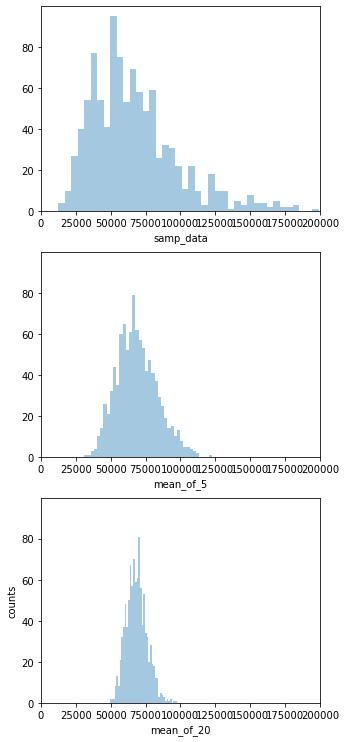

In [4]:
fig, ax = plt.subplots(nrows=3,ncols=1, sharey=True, figsize=(5,9))
for i, col in enumerate(sample.columns):
    sns.distplot(sample[col], bins=40, kde = False, ax = ax[i])
    ax[i].set_xlim(0,200000)

plt.subplots_adjust(top=1.2)
plt.ylabel('counts')

In [5]:
n = 20
R = 1000
boot_sample = pd.DataFrame({'samp': [loans_income.sample(n, replace=True).x.mean() for _ in range(R)]})

In [6]:
print("Meadian: {}".format(boot_sample.median().values[0]))
print("Standard Error: {:.2f}".format(boot_sample.std().values[0]))

Meadian: 68727.075
Standard Error: 7584.71


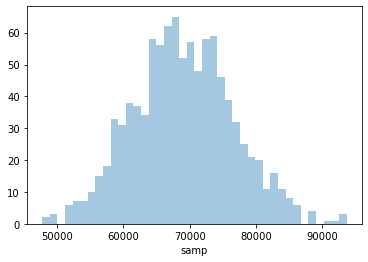

In [7]:
sns.distplot(boot_sample['samp'], bins=40, kde=False)

### Standard Error = $\frac{s}{\sqrt{n}}$

In [8]:
standard_error = loans_income.x.std()/math.sqrt(n)
print("Standard Error: {:.2f}".format(standard_error))

Standard Error: 7350.41


In [9]:
def get_sample_z(sample):
    z = (sample - np.mean(sample))/np.std(sample)
    df = pd.DataFrame({"x": sample, "y": z})
    return df

def newline(p1, p2, ax=None):
    if not ax:
        ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color='#32696969')
    ax.add_line(l)
    return l

In [10]:
norm_samp = np.random.normal(size=(100))

In [11]:
normal_df = get_sample_z(norm_samp)

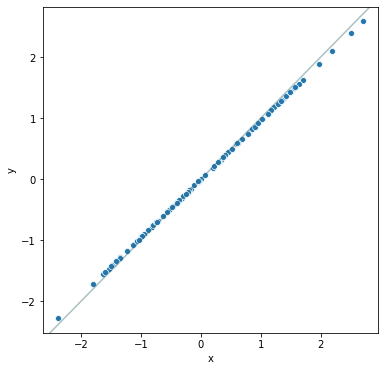

In [12]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x='x', y='y', data=normal_df)
newline([0,0],[1,1])

In [13]:
sp500_px = pd.read_csv('data/sp500_data.csv')
nflx = sp500_px['NFLX']

In [14]:
nflx = nflx[nflx>0].apply(np.log).diff().dropna()

In [15]:
nflx_df = get_sample_z(nflx.values)

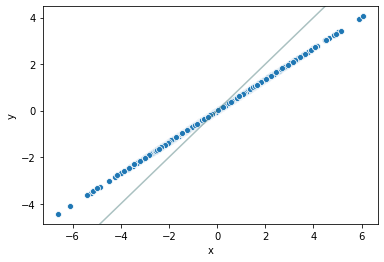

In [16]:
sns.scatterplot(x='x',y='y', data=nflx_df)
newline([0,0],[1,1])

# Binomial Distribution

$f(n,k,p) = {n \choose k}p^k(1-p)^{n-k}$

In [17]:
scipy.stats.binom.pmf(k=2, n=5, p=0.1)

0.0729

In [18]:
scipy.stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

# Poisson Distribution

In [19]:
scipy.stats.poisson.rvs(mu=2, size=100)

array([2, 2, 1, 3, 1, 3, 1, 4, 4, 0, 2, 1, 3, 5, 2, 3, 1, 2, 0, 2, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 5, 3, 2, 0, 1, 2, 2, 3, 3, 2, 1, 3, 3, 3,
       0, 2, 1, 3, 2, 0, 2, 2, 1, 4, 0, 3, 1, 4, 2, 2, 3, 1, 3, 0, 5, 5,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 6, 2, 4, 1, 1, 2, 2, 1, 2, 2, 3, 2, 4,
       1, 4, 2, 1, 2, 3, 5, 0, 1, 3, 3, 1])

# Exponential Distribution
**scipy**: $f(x) = e^{-\frac{x}{scale}}$

**rexp**: $f(x) = \lambda e^{-\lambda x}$

Hence $scale = \frac{1}{\lambda}$ and we divide scipy result by $scale$

In [20]:
sc = 1/0.2
scipy.stats.expon.rvs(size=100, scale=sc)/sc

array([1.07849637, 0.88335134, 0.75873136, 2.04441843, 0.43860944,
       0.21192195, 0.74688747, 0.17286096, 1.8335849 , 1.80113981,
       0.38200202, 0.72090215, 1.40806137, 0.44235789, 0.98194839,
       0.41265038, 2.34527749, 5.88959418, 0.10572681, 0.16663931,
       0.17567565, 1.21511555, 0.27727443, 1.42235217, 1.0479759 ,
       1.69349229, 3.36918148, 5.56062328, 0.69461187, 0.8399735 ,
       1.54049333, 1.71958234, 1.00204921, 0.58363193, 1.21311578,
       0.16096269, 1.5636601 , 0.12595683, 2.49418726, 1.71543716,
       0.24810703, 0.95685422, 0.67805369, 3.7638229 , 0.3223841 ,
       0.94686793, 0.98470575, 0.71789823, 0.78804369, 2.03807234,
       1.2485497 , 1.17907587, 0.35676658, 0.8433599 , 2.51781578,
       0.71741153, 0.29667538, 0.5255446 , 0.48993248, 1.10290904,
       0.09206996, 0.11945141, 0.77877538, 0.34129082, 0.22849241,
       3.29771231, 0.28276289, 1.13786225, 1.99090279, 2.6380408 ,
       0.11686729, 1.72431704, 0.26608291, 2.11446209, 0.37163

# Weibull Distribution
$f(x,c,\lambda) = \frac{c}{\lambda}(\frac{x}{\lambda})^{c-1}e^{\frac{x}{\lambda}^c}$

$\lambda = scale$

In [21]:
scipy.stats.weibull_min.rvs(size=100,c=1.5, scale=5000)

array([ 4038.68748611,  6562.86709335, 12349.07675869,  2700.2994682 ,
        7672.96342081,  7242.05175442,  2882.29064153,  5106.41375422,
         749.73415418,  3005.93093526,  4503.33562783,  6306.38632072,
        4516.64089583, 17284.88719893,   644.46425289,  1770.64682446,
        5013.60118229,  6507.26796176,  3247.9258989 ,  2538.51783344,
        6710.48561875,  2087.30065299,   368.74237183,  5673.41396018,
        4292.41064051,  4424.5133406 ,  4361.48788559,  2689.29809495,
        4136.62856298,  4389.50963053,  2238.19456113,  5963.96152593,
        2390.53804377,  4435.22091268,   303.84652812,  3132.90024951,
        9714.56660691,  3938.83976911,  3300.87998235,  9971.47655974,
        3601.26087667,  7435.24205561,  2948.76211311,   499.10941306,
        2762.81379283,  4573.37293954,  2675.96363417,  4916.54200164,
        1229.06298359,  3136.60628149, 10419.54185993,  2757.63354997,
        1681.17258673,  7260.56532389, 15439.05946945,  3936.72372644,
      